# Multiclass-image-classification-with-ANN

Install Tensorflow

In [118]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [119]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
print(tf.__version__)

2.0.0


Data preprocessing 

In [120]:
#import datasets
from tensorflow.keras.datasets import fashion_mnist

In [121]:
#loading datasets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()  

In [122]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [123]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [124]:
#check the image pixel values (here for the conviniant it uses only the image (4))
x_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
          0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,
         46, 162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [125]:
#getting the lowest and the highest pixel values 
np.min(x_train), np.max(x_train)

(0, 255)

In [126]:
#getting the highest and the lowest lable (class) values
np.min(y_train), np.max(y_test)

(0, 9)

In [127]:
#check class names 
class_names = ['0 Top/T-shirt','1 Trouser','2 Pullover','3 Dress','4 Coat','5 Sanal','6 Shirt','7 Sneaker','8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sanal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


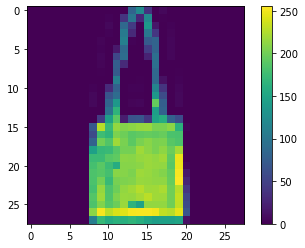

In [128]:
# data exploration 
plt.figure()
plt.imshow(x_train[200])
# colobar contains 0 to 255 colors
plt.colorbar()

In [129]:
name=(y_train[200])
print(class_names[name])

8 Bag


In [130]:
# normalazation values (Make it easy for the ANN to learn the model)
x_train= x_train/255.0
x_test= x_test/255.0

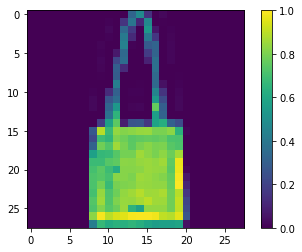

In [131]:
#now color values are spread between 0 and 1
# data exploration 
plt.figure()
plt.imshow(x_train[200])
# colobar contains 0 to 255 colors
plt.colorbar()

In [132]:
#flatten the datasets
#ANN takes values in 1d array. checking how data set is 
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [133]:
# Array is in 28*28 pixel photos, now it needs to convert to 1D array 
# -1 is to consider all the 60000 images, 28*28 to convert for the 1D array 
x_train= x_train.reshape(-1, 28*28 )
x_test = x_test.reshape(-1, 28*28)

In [134]:
# check the shape 
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [135]:
# define an objests (model) Sequential class becasue adding different layers 
model = tf.keras.models.Sequential()

In [136]:
# sequenceof layers
#adding first fully connected hidden layers
#  units (number of neurons)  = 128
# activation function = ReLu
# input shape = 784
model.add(tf.keras.layers.Dense(units = 128, activation = "relu", input_shape=(784,)))
# we keep comma after the 784 to make vector 

In [137]:
# adding the second layer with dropout (droupout is a regulization technique)
# drop out - randomly selected neuron are ignored, so backward, forward propergession are not going to consider 
# drop out - prevent the overfitting 
# normally dropout 20% to 50% neuorne
model.add(tf.keras.layers.Dropout(0.3))


In [138]:
# Adding the output layer
# units =10 (beacuse of having 10 classes)
# activaiton = softamx 
model.add(tf.keras.layers.Dense(units =10, activation='softmax'))

In [139]:
# comlining the model 
# 1 optiizers (minimize the loss function )
# 2 loss functon (act as a guide to the optimizer) sparse_catergorical_crossentropy
# 3 matrices (to get the accuracy) sparse_catergorical_accuarcy 
model.compile(optiizer='adam', loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

In [140]:
# check the model summary 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [141]:
#  train the model
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.5540 - sparse_categorical_accuracy: 0.8064
Epoch 2/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.4302 - sparse_categorical_accuracy: 0.8486
Epoch 3/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.4131 - sparse_categorical_accuracy: 0.8571
Epoch 4/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.4034 - sparse_categorical_accuracy: 0.8630
Epoch 5/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.4001 - sparse_categorical_accuracy: 0.8682
Epoch 6/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.3924 - sparse_categorical_accuracy: 0.8692
Epoch 7/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.3898 - sparse_categorical_accuracy: 0.8717
Epoch 8/10
60000/60000 [==============================] - 12s 192us/sample - loss

In [142]:
# model evaluation 
test_loss, test_accuracy = model.evaluate(x_test, y_test) 

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [143]:
print("Test accuracy: {}".format(100*(test_accuracy)))

Test accuracy: 87.19000220298767


There is less gap between the train acuracy(87.72), and the model accuray on test data (87.36) so the model working fines 

In [144]:
# model prediction 
# asign the predicted class label for all x_test values. 
y_pred = model.predict_classes(x_test)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [145]:
# Check the predicted values and actual values for random test data 
y_pred[100], y_test[100]

(3, 3)

In [146]:
# display rhr calss names
if y_pred[0] == y_test[0]:
    print("Equal! ",class_names[y_pred[0]] )
else:
    print("Not equal")

Equal!  9 Ankle boot


In [147]:
# confusion matrix 
from sklearn.metrics import confusion_matrix, accuracy_score
confusionMatrix = confusion_matrix(y_pred, y_test)
print(confusionMatrix)

[[818   7  17  32   1   0 131   0   3   0]
 [  0 959   1   1   1   0   1   0   1   0]
 [ 18   1 799  15 100   0 104   0   1   0]
 [ 22  25   7 842  13   0  15   0   6   0]
 [  2   2  99  56 811   0  69   0   3   0]
 [  0   0   1   0   1 970   0  32   5  18]
 [129   5  73  48  69   0 665   0   8   1]
 [  0   0   0   0   0  17   0 937   2  34]
 [ 11   1   3   6   4   2  15   0 971   0]
 [  0   0   0   0   0  11   0  31   0 947]]


In [148]:
# accuracy score based on confusion matix 
acc_cm= accuracy_score(y_pred, y_test)
print(100*acc_cm)

87.19
